In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




In [257]:
df1= pd.read_csv('respiartory_rate_prediction (4).csv')


In [258]:
df1.head()

,heart_rate,body_temperature,oxygen_saturation,respiratory_rate
0,69.636603,36.946136,92.055299,13.087644
1,118.919597,36.662769,100.000000,18.000000
2,90.183049,37.500000,100.000000,16.229694
3,93.264870,37.500000,100.000000,14.828433
4,42.267821,36.660542,87.598401,11.059947


In [259]:
df1.duplicated().sum()


10

In [260]:
df= df1.drop_duplicates()


In [261]:
df.duplicated().sum()

0

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   heart_rate         990 non-null    float64
 1   body_temperature   990 non-null    float64
 2   oxygen_saturation  990 non-null    float64
 3   respiratory_rate   990 non-null    float64
dtypes: float64(4)
memory usage: 38.7 KB


In [263]:
df.isnull().sum()

heart_rate           0
body_temperature     0
oxygen_saturation    0
respiratory_rate     0
dtype: int64

In [264]:
df.describe()

,heart_rate,body_temperature,oxygen_saturation,respiratory_rate
count,990.000000,990.000000,990.000000,990.000000
mean,79.191258,36.937696,94.775231,14.159599
std,18.682453,0.449791,6.467968,1.872105
min,40.000000,36.000000,69.478515,10.500000
25%,66.486974,36.617303,90.708322,12.847047
50%,79.044734,36.983784,97.655579,14.107378
75%,92.488000,37.338772,100.000000,15.455415
max,120.000000,37.500000,100.000000,18.000000


In [265]:
df.isnull().sum()

heart_rate           0
body_temperature     0
oxygen_saturation    0
respiratory_rate     0
dtype: int64

<Axes: >

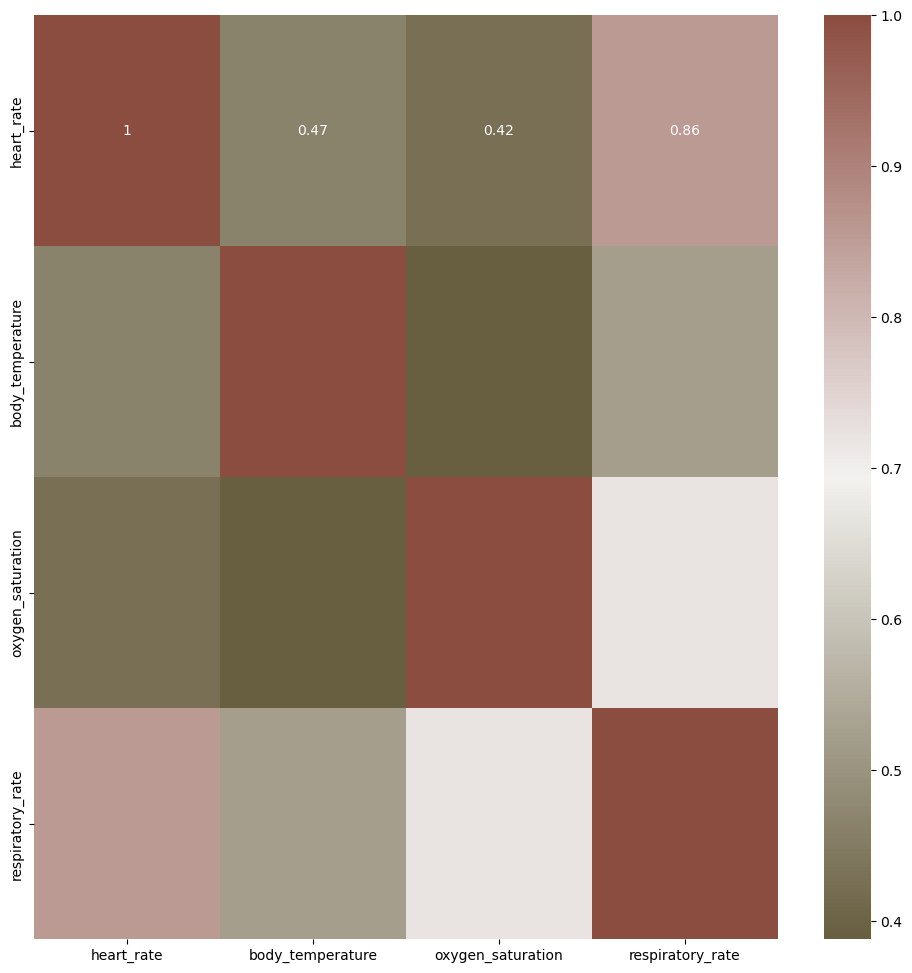

In [266]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

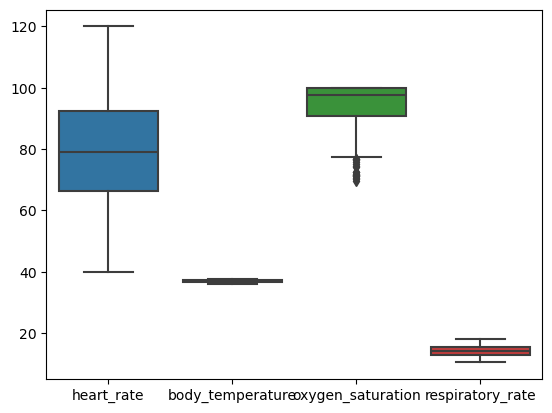

In [267]:
b=sns.boxplot(df)

In [268]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
daf=scaler.fit_transform(df)
datas=pd.DataFrame(daf)

<Axes: ylabel='Density'>

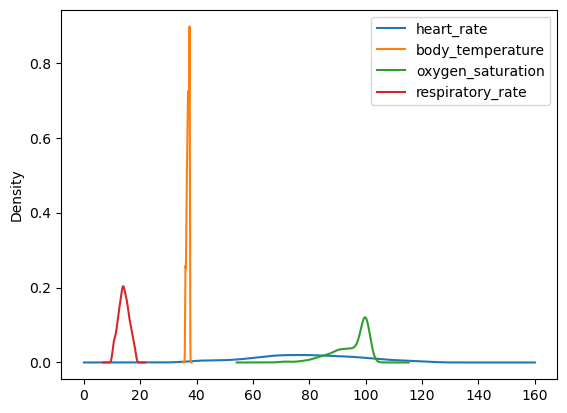

In [269]:
df.plot.kde()

<Axes: ylabel='Density'>

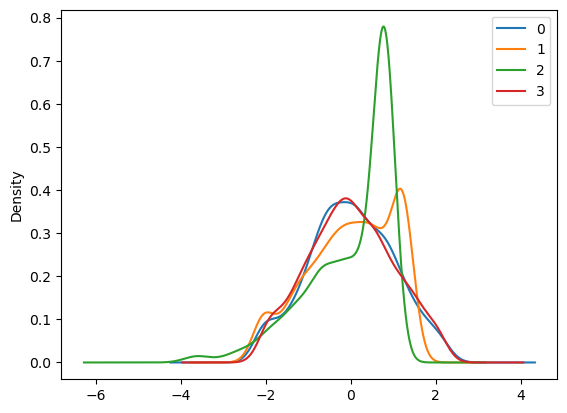

In [270]:
datas.plot.kde()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

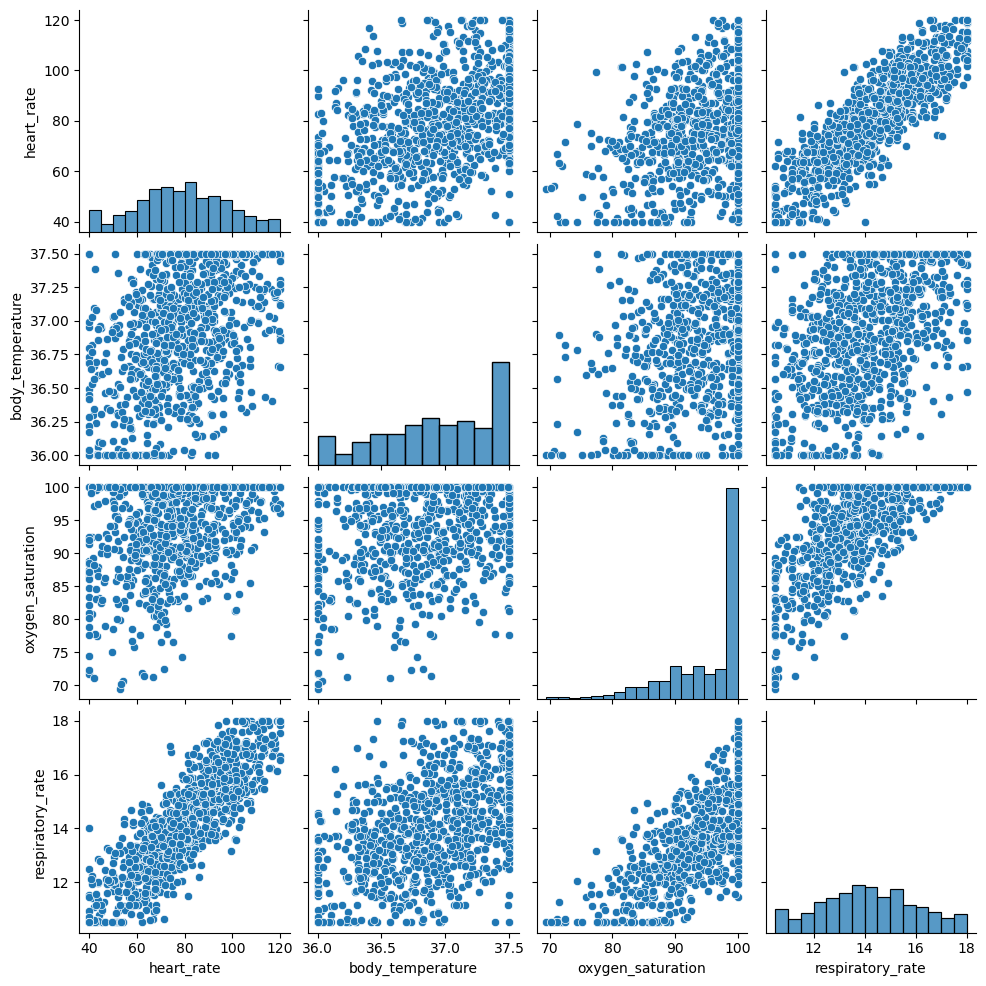

In [271]:
ax=sns.pairplot(df)


<Axes: >

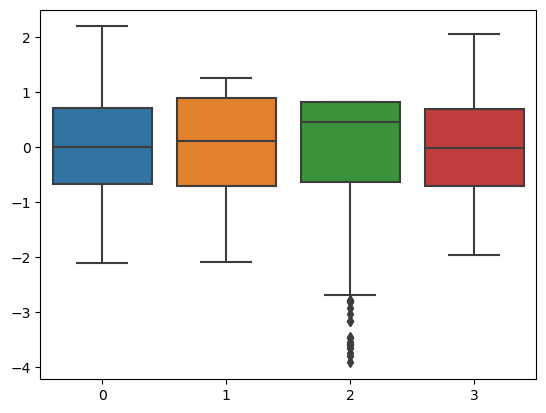

In [272]:
sns.boxplot(datas)

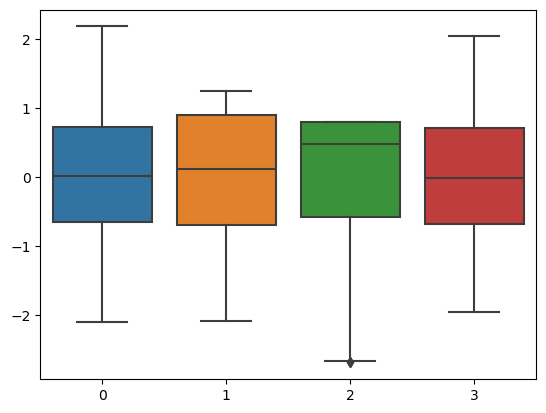

In [273]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in datas.columns:
    datas = remove_outliers(datas, col)

sns.boxplot(data=datas)
plt.show()



C:\Users\Hp\AppData\Local\Temp\ipykernel_16908\4053970795.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas[3],bins=50,color='r',ax=ax)
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of RR')

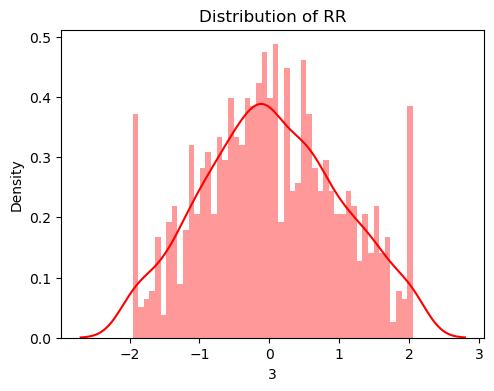

In [274]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(datas[3],bins=50,color='r',ax=ax)
ax.set_title('Distribution of RR')


In [275]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = datas.drop(columns=[3],axis=1)
y = datas[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=23)
model =XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.10584644134908607


In [276]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8821362817340864


In [277]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

r2_scorer = make_scorer(r2_score)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
print("Cross-validated R^2 scores:", cv_scores)
print("Average Cross-validated R^2 score:", cv_scores.mean())

param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 6, 9]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring=r2_scorer)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best R^2 score from GridSearchCV:", grid_search.best_score_)


Cross-validated R^2 scores: [0.84199261 0.9001488  0.86103937 0.8715364  0.86331287]
Average Cross-validated R^2 score: 0.8676060102138496


C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator__max_depth", "estimator__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator__max_depth", "estimator__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator__max_depth", "estimator__n_estimators" } are not used

Best parameters found: {'estimator__max_depth': 3, 'estimator__n_estimators': 50}
Best R^2 score from GridSearchCV: 0.8676060102138496


C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:52:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator__max_depth", "estimator__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [278]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [279]:
RandomForest_reg.fit(X_train, y_train)
y_pred = RandomForest_reg.predict(X_test)

In [280]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

In [281]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.895562,0.894138,0.88993,0.306251


In [282]:
from sklearn.preprocessing import PolynomialFeatures

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y,test_size=0.23,random_state=23)

plr = LinearRegression().fit(X_train,y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print(plr.score(X_test,y_test))

0.900657214985985
